# Retail Data Analysis

This notebook performs a comprehensive analysis of retail data, including SQL queries, EDA, visualizations, and business insights.

## A. Basic SQL Queries

1. Retrieve all stock items that contain the word "T-LIGHT" in their description.
2. Calculate the total quantity sold per StockCode.
3. Find total revenue (Quantity × UnitPrice) per CustomerID.
4. Get a list of all invoices and count of distinct stock items per invoice.
5. Perform an inner join between sales and stock details to display full item names along with total revenue per item.

## B. EDA Using Pandas

6. Check for missing values, data types, and duplicates in both datasets.
7. Convert InvoiceDate into datetime, and extract: Invoice date, Month, Hour of transaction.
8. Add a new column TotalPrice = Quantity × UnitPrice.
9. Identify the top 3 bestselling items by quantity sold.
10. Find out how many unique customers made purchases and the average quantity per invoice.

## C. Visualization

11. Plot a bar chart of top 10 items by quantity sold.
12. Plot total sales per hour of the day to understand peak shopping hours.
13. Create a pie chart showing revenue distribution among top 5 customers.
14. Visualize the monthly revenue trend using a line chart.
15. Create a stacked bar chart of top 5 invoices by revenue, showing contribution from each item.

## D. Business Insights

16. Identify which product generates the highest total revenue.
17. Determine average order value per invoice.
18. Find the customer with the highest number of transactions.
19. Evaluate the percentage of stock items sold vs. total in inventory.
20. Check how many products in the sales data do not have a matching entry in the stockDetails file.


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
sales_df = pd.read_csv('/Users/ramjeetdixit/Downloads/Sales.csv')
stock_df = pd.read_csv('/Users/ramjeetdixit/Downloads/StockDetails.csv')

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('retail_data.db')

# Load DataFrames into SQLite database
sales_df.to_sql('SalesDetails', conn, if_exists='replace', index=False)
stock_df.to_sql('StockDetails', conn, if_exists='replace', index=False)



1703

In [2]:
# A. Basic SQL Queries

# 1. Retrieve all stock items that contain the word "T-LIGHT" in their description.
query1 = """
SELECT * FROM StockDetails
WHERE Description LIKE '%T-LIGHT%'
"""
result1 = pd.read_sql(query1, conn)
print(result1)



   StockCode                          Description
0      22809              SET OF 6 T-LIGHTS SANTA
1      84347  ROTATING SILVER ANGELS T-LIGHT HLDR
2      84945   MULTI COLOUR SILVER T-LIGHT HOLDER
3      22808      SET OF 6 T-LIGHTS EASTER CHICKS
4      22178      VICTORIAN GLASS HANGING T-LIGHT
5      84949        SILVER HANGING T-LIGHT HOLDER
6      22807         SET OF 6 T-LIGHTS TOADSTOOLS
7     72351A   SET/6 TURQUOISE BUTTERFLY T-LIGHTS
8     72351B       SET/6 PINK  BUTTERFLY T-LIGHTS
9     85170C       SET/6 EAU DE NIL BIRD T-LIGHTS
10     22893       MINI CAKE STAND T-LIGHT HOLDER
11     23057     BEADED CHANDELIER T-LIGHT HOLDER
12     23056    FLOWERS CHANDELIER T-LIGHT HOLDER
13     23055      IVORY CHANDELIER T-LIGHT HOLDER
14     71459       HANGING JAM JAR T-LIGHT HOLDER
15     84755  COLOUR GLASS T-LIGHT HOLDER HANGING
16     72586    SET OF 6 HALLOWEEN GHOST T-LIGHTS
17    84970L     SINGLE HEART ZINC T-LIGHT HOLDER
18    84970S    HANGING HEART ZINC T-LIGHT HOLDER


In [3]:
# 2. Calculate the total quantity sold per StockCode.
query2 = """
SELECT StockCode, SUM(Quantity) as TotalQuantity
FROM SalesDetails
GROUP BY StockCode
"""
result2 = pd.read_sql(query2, conn)
print(result2)



     StockCode  TotalQuantity
0        10002              1
1        10125            120
2        10135            200
3        11001             32
4        15034             24
...        ...            ...
1666    90201D             18
1667    90202D              6
1668     90204              4
1669         M              2
1670      POST           1104

[1671 rows x 2 columns]


In [24]:
# 3. Find total revenue (Quantity × UnitPrice) per CustomerID.
query3 = """
SELECT CustomerID, SUM(Quantity * UnitPrice) as TotalRevenue
FROM SalesDetails
GROUP BY CustomerID
"""
result3 = pd.read_sql(query3, conn)
print(result3)



    CustomerID  TotalRevenue
0        12426        582.73
1        12427        708.37
2        12468        724.04
3        12471      18740.92
4        12472       6229.48
..         ...           ...
90       13814       1562.12
91       13815       4014.91
92       13816        555.04
93       13817        382.98
94       14335        468.26

[95 rows x 2 columns]


In [5]:
# 4. Get a list of all invoices and count of distinct stock items per invoice.
query4 = """
SELECT InvoiceNo, COUNT(DISTINCT StockCode) as DistinctStockItems
FROM SalesDetails
GROUP BY InvoiceNo
"""
result4 = pd.read_sql(query4, conn)
print(result4)



    InvoiceNo  DistinctStockItems
0      536527                  15
1      536840                  11
2      536861                  10
3      536967                   2
4      536983                   9
..        ...                 ...
598   C580313                   5
599   C580714                   2
600   C580740                   2
601   C580989                   1
602   C581409                  13

[603 rows x 2 columns]


In [6]:
# 5. Perform an inner join between sales and stock details to display full item names along with total revenue per item.
query5 = """
SELECT s.StockCode, st.Description, SUM(s.Quantity * s.UnitPrice) as TotalRevenue
FROM SalesDetails s
INNER JOIN StockDetails st ON s.StockCode = st.StockCode
GROUP BY s.StockCode, st.Description
"""
result5 = pd.read_sql(query5, conn)
print(result5)



     StockCode                        Description  TotalRevenue
0        10002        INFLATABLE POLITICAL GLOBE           0.85
1        10125            MINI FUNKY DESIGN TAPES         84.80
2        10135       COLOURING PENCILS BROWN TUBE        212.00
3        11001        ASSTD DESIGN RACING CAR PEN         54.08
4        15034        PAPER POCKET TRAVELING FAN           3.36
...        ...                                ...           ...
1698    90201D           GREEN ENAMEL FLOWER RING         53.10
1699    90202D        PINK ENAMEL FLOWER HAIR TIE         17.70
1700     90204  PAIR OF ENAMEL BUTTERFLY HAIRCLIP         13.40
1701         M                             Manual         68.81
1702      POST                            POSTAGE      20821.00

[1703 rows x 3 columns]


In [27]:
# B. EDA Using Pandas

# 6. Check for missing values, data types, and duplicates in both datasets.
missing_values_sales = sales_df.isnull().sum()
missing_values_stock = stock_df.isnull().sum()
data_types_sales = sales_df.dtypes
data_types_stock = stock_df.dtypes
duplicates_sales = sales_df.duplicated().sum()
duplicates_stock = stock_df.duplicated().sum()
print(missing_values_sales)
print(missing_values_stock)
print(data_types_sales)
print(data_types_stock)
print(duplicates_sales)
print(duplicates_stock)



InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
InvoiceDateOnly    0
InvoiceMonth       0
InvoiceHour        0
TotalPrice         0
dtype: int64
StockCode      0
Description    0
dtype: int64
InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                  int64
Country                    object
InvoiceDateOnly            object
InvoiceMonth                int32
InvoiceHour                 int32
TotalPrice                float64
dtype: object
StockCode      object
Description    object
dtype: object
15
0


In [8]:
# 7. Convert InvoiceDate into datetime, and extract: Invoice date, Month, Hour of transaction
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], dayfirst=True)
sales_df['InvoiceDateOnly'] = sales_df['InvoiceDate'].dt.date
sales_df['InvoiceMonth'] = sales_df['InvoiceDate'].dt.month
sales_df['InvoiceHour'] = sales_df['InvoiceDate'].dt.hour



In [29]:
# 8. Add a new column TotalPrice = Quantity × UnitPrice
sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Print first 5 rows to verify
print("Sample rows with TotalPrice column:")
print(sales_df[['Quantity', 'UnitPrice', 'TotalPrice']].head())



Sample rows with TotalPrice column:
   Quantity  UnitPrice  TotalPrice
0         6       2.95        17.7
1         6       2.55        15.3
2        12       0.85        10.2
3        12       1.65        19.8
4        12       1.95        23.4


In [30]:
# 9. Identify the top 3 bestselling items by quantity sold.
top_3_bestselling_items = sales_df.groupby('StockCode')['Quantity'].sum().nlargest(3)
print(top_3_bestselling_items)



StockCode
22326    1218
15036    1164
POST     1104
Name: Quantity, dtype: int64


In [31]:
 #10. Find out how many unique customers made purchases and the average quantity per invoice.
unique_customers = sales_df['CustomerID'].nunique()
average_quantity_per_invoice = sales_df.groupby('InvoiceNo')['Quantity'].mean().mean()
print(unique_customers, average_quantity_per_invoice)



95 9.205045350924442


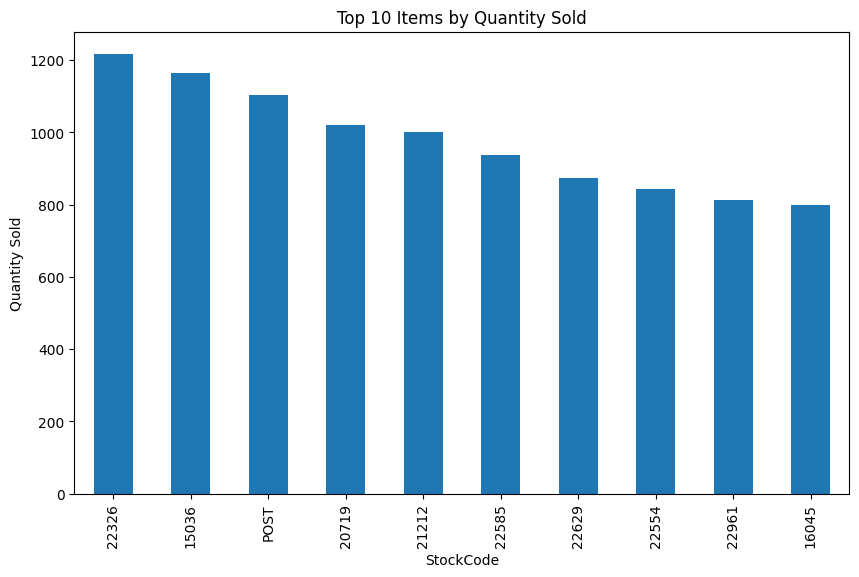

In [12]:
# C. Visualization

# 11. Plot a bar chart of top 10 items by quantity sold.
top_10_items = sales_df.groupby('StockCode')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar')
plt.title('Top 10 Items by Quantity Sold')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.show()



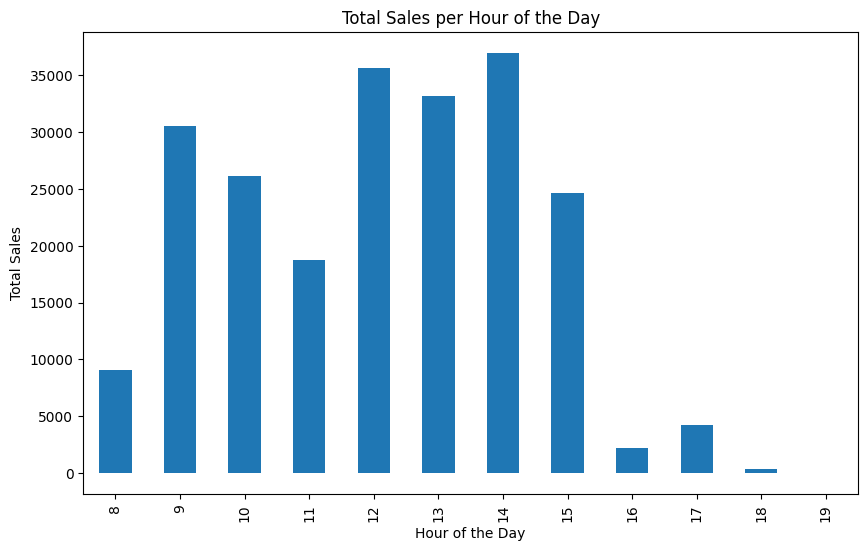

In [13]:
# 12. Plot total sales per hour of the day to understand peak shopping hours.
sales_per_hour = sales_df.groupby('InvoiceHour')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
sales_per_hour.plot(kind='bar')
plt.title('Total Sales per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()



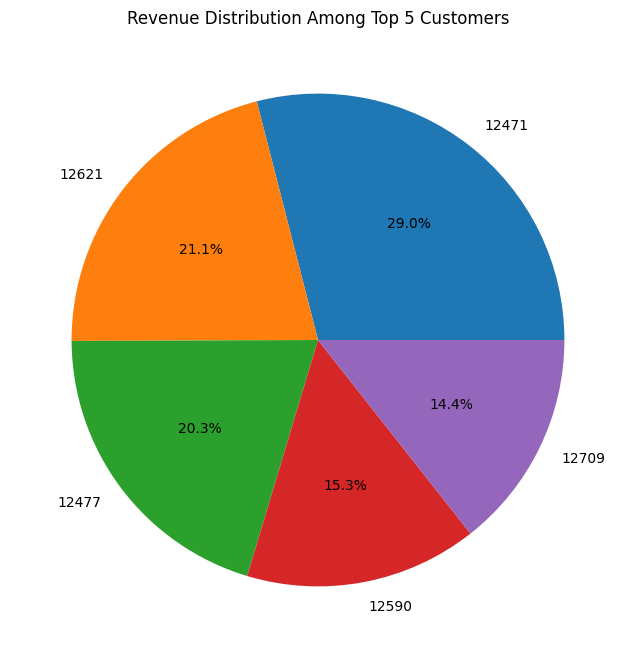

In [14]:
# 13. Create a pie chart showing revenue distribution among top 5 customers.
top_5_customers = sales_df.groupby('CustomerID')['TotalPrice'].sum().nlargest(5)
plt.figure(figsize=(8, 8))
top_5_customers.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Distribution Among Top 5 Customers')
plt.ylabel('')
plt.show()



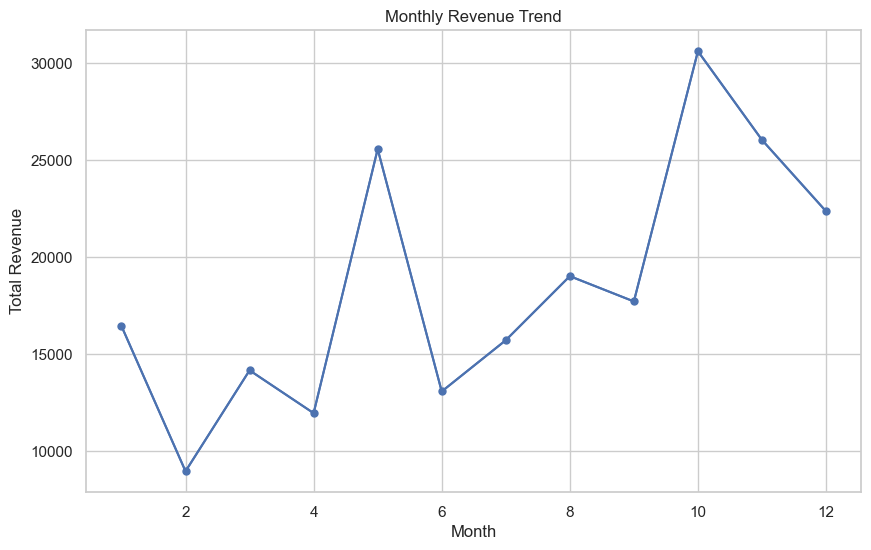

In [35]:
# 14. Visualize the monthly revenue trend using a line chart.
import seaborn as sns

sns.set(style="whitegrid")
monthly_revenue = sales_df.groupby('InvoiceMonth')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line')
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='b', markersize=5)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()



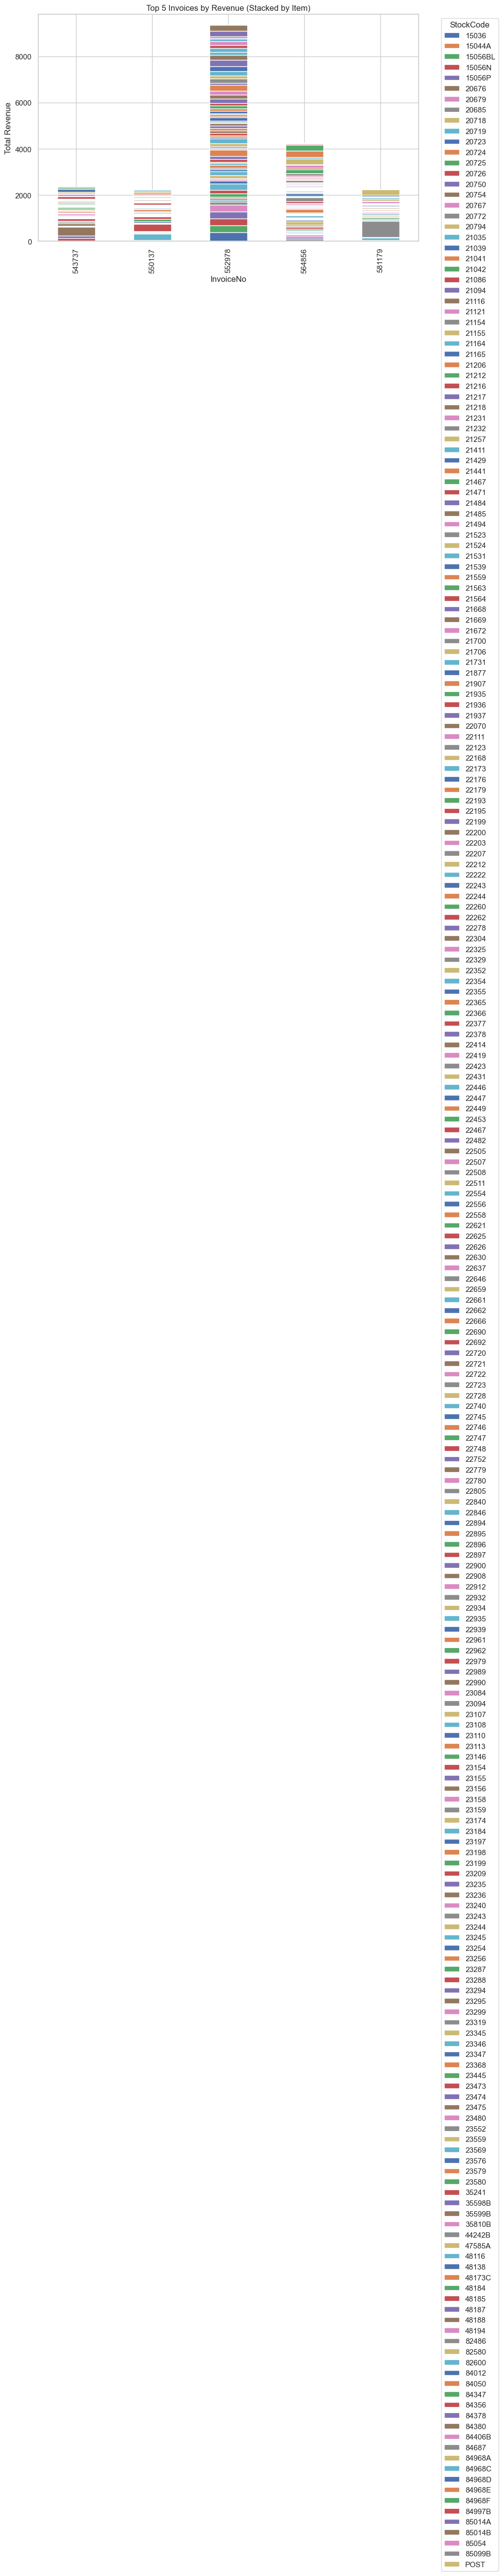

In [37]:
# 15. Create a stacked bar chart of top 5 invoices by revenue, showing contribution from each item.
top_5_invoices = sales_df.groupby('InvoiceNo')['TotalPrice'].sum().nlargest(5).index
top_5_invoices_data = sales_df[sales_df['InvoiceNo'].isin(top_5_invoices)]
stacked_data = top_5_invoices_data.pivot_table(index='InvoiceNo', columns='StockCode', values='TotalPrice', aggfunc='sum').fillna(0)
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 5 Invoices by Revenue (Stacked by Item)')
plt.xlabel('InvoiceNo')
plt.ylabel('Total Revenue')
plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [45]:
# D. Business Insights

# 16. Identify which product generates the highest total revenue.
highest_revenue_product = sales_df.groupby('StockCode')['TotalPrice'].sum().idxmax()
highest_revenue_product_value = sales_df.groupby('StockCode')['TotalPrice'].sum().max()
product_name = stock_df.loc[stock_df['StockCode'] == highest_revenue_product, 'Description'].values
product_name = product_name[0] if len(product_name) else 'N/A'
print(f"Highest Revenue Product: {highest_revenue_product} ({product_name})")
print(f"Highest Revenue Product Value: {highest_revenue_product_value:.2f}")



Highest Revenue Product: POST (POSTAGE)
Highest Revenue Product Value: 20821.00


In [47]:
# 17. Determine average order value per invoice.
average_order_value = sales_df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
print(f"Average Order Value Per Invoice: {average_order_value:.2f}")




Average Order Value Per Invoice: 367.66


In [50]:
# 18. Find the customer with the highest number of transactions.
customer_with_highest_transactions = sales_df['CustomerID'].value_counts().idxmax()
transactions_count = sales_df['CustomerID'].value_counts().max()
print(f"Top Customer ID: {customer_with_highest_transactions}")
print(f"Number of Transactions: {transactions_count}")


Top Customer ID: 12471
Number of Transactions: 531


In [53]:
# 19. Evaluate the percentage of stock items sold vs. total in inventory.
total_stock_items = stock_df['StockCode'].nunique()
sold_stock_items = sales_df['StockCode'].nunique()
percentage_sold = (sold_stock_items / total_stock_items) * 100
print(percentage_sold)
print(total_stock_items, sold_stock_items)


100.0
1671 1671


In [56]:
# 20. Check how many products in the sales data do not have a matching entry in the stockDetails file.
unmatched_products = sales_df[~sales_df['StockCode'].isin(stock_df['StockCode'])]['StockCode'].nunique()
print(f"Number of products in sales data with no match in StockDetails: {unmatched_products}")

Number of products in sales data with no match in StockDetails: 0


In [1]:
for i in range(3): 
    print(i)

0
1
2


In [2]:
def add(x, y):  
    return x + y  
print(add(3, 5))

8


In [3]:
gen = (x*x for x in range(3))
print(next(gen))
print(next(gen))

0
1
